In [1]:
from pathlib import Path

import PIL
import pandas as pd
from PIL import features, Image
from distutils.version import LooseVersion

In [2]:
print(f"PIL version: {PIL.__version__}")
if features.check_feature('libjpeg_turbo'):
    print("libjpeg-turbo is on")
else:
    print("libjpeg-turbo is NOT on")

PIL version: 8.1.0
libjpeg-turbo is NOT on


In [3]:
data_path = Path('../data')
data_path.exists()

True

In [4]:
train = pd.read_csv(data_path / 'train.csv')
print(train.shape)
train.head(10)

(30083, 13)


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
5,1.2.826.0.1.3680043.8.498.11707076266253086830...,0,0,1,0,0,0,1,0,0,1,0,8260896cf
6,1.2.826.0.1.3680043.8.498.23133310896792275593...,0,0,0,0,0,0,0,0,1,1,0,f6147af3f
7,1.2.826.0.1.3680043.8.498.17332833449968516367...,0,0,1,0,0,0,1,0,1,0,0,27413587b
8,1.2.826.0.1.3680043.8.498.91266853519846682206...,0,0,0,0,0,1,0,0,0,1,0,2edf3dce3
9,1.2.826.0.1.3680043.8.498.12706894217669234973...,0,1,0,0,0,0,1,0,0,1,0,3d5e7832e


This is a multi-label classification problem, as more than one label can occur per image.

In [5]:
i = 0
for row in train.iterrows():
    print(row[1][1:-1].sum())
    i += 1
    if i == 15:
        break

1
3
1
1
1
3
2
3
2
3
4
1
1
1
1


Not every label occurs with the same frequency.

In [6]:
train.mean().sort_values(ascending=False)

CVC - Normal                  0.708839
CVC - Borderline              0.281222
ETT - Normal                  0.240667
NGT - Normal                  0.159459
CVC - Abnormal                0.106206
NGT - Incompletely Imaged     0.091347
ETT - Borderline              0.037829
Swan Ganz Catheter Present    0.027590
NGT - Borderline              0.017585
NGT - Abnormal                0.009274
ETT - Abnormal                0.002626
dtype: float64

## `StudyInstanceUID`

In [7]:
d = dict()
for uuid in train.StudyInstanceUID:
    length = len(uuid.split('.'))
    if length in d.keys():
        d[length] += 1
    else:
        d[length] = 1
d

{9: 30083}

In [8]:
train.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [9]:
train.tail()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8
30082,1.2.826.0.1.3680043.8.498.99518162226171269731...,0,0,1,0,0,0,0,0,0,1,0,e692d316c


It seems that the first part of the UID is the same for every image.

## Images

Let's preview a few images from the training set.

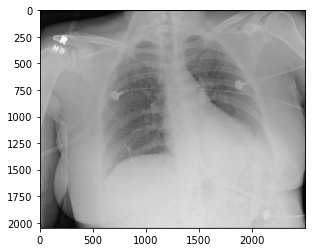

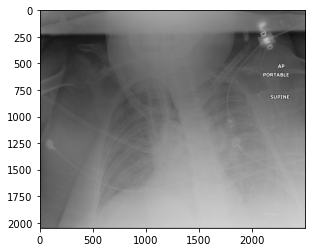

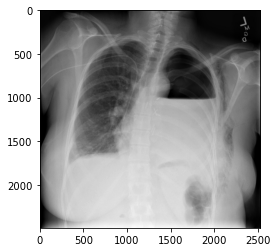

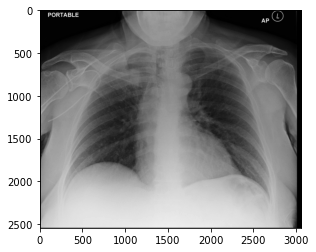

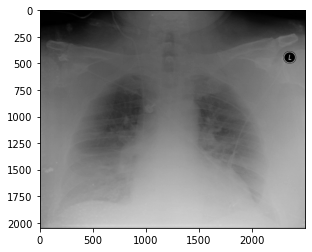

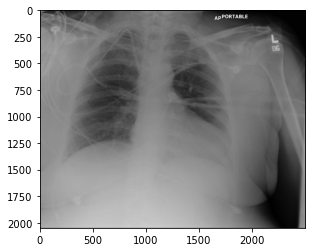

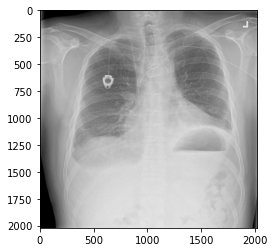

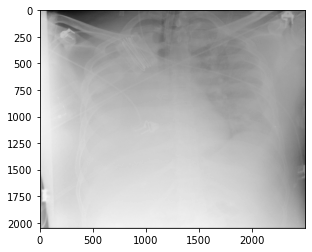

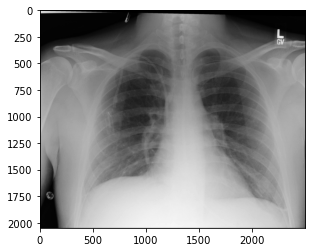

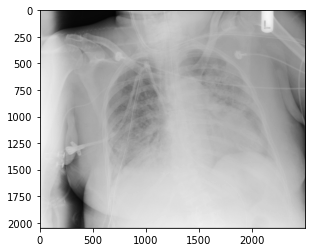

In [10]:
import matplotlib.pyplot as plt
for i in range(10):
    img = Image.open(data_path / f'train/{train.StudyInstanceUID.values[i]}.jpg')
    plt.figure()
    plt.imshow(img, cmap='gray')

It would be interesting to use some technique like CAM to validate that the network is focusing on the right area to make a decision about the right label to assign. 

Images are not all of the same size.

In [11]:
d = dict()
for img_path in [data_path / f'train/{train.StudyInstanceUID.values[i]}.jpg' for i in range(500)]:
    img = Image.open(img_path)
    if img.size in d.keys():
        d[img.size] += 1
    else:
        d[img.size] = 1
    d[img.size]

In [12]:
dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

{(2500, 2048): 274,
 (3056, 2544): 125,
 (2992, 2991): 44,
 (2021, 2021): 7,
 (2048, 2500): 7,
 (2544, 3056): 5,
 (2990, 2991): 4,
 (2021, 2020): 2,
 (2774, 2991): 2,
 (2526, 2493): 1,
 (3032, 2544): 1,
 (2632, 2765): 1,
 (2992, 2989): 1,
 (2658, 2991): 1,
 (2582, 2991): 1,
 (2822, 2957): 1,
 (3056, 2516): 1,
 (3056, 2172): 1,
 (2514, 2991): 1,
 (2992, 2881): 1,
 (2968, 2827): 1,
 (2992, 2981): 1,
 (2614, 2991): 1,
 (2526, 2897): 1,
 (2020, 2021): 1,
 (2856, 2544): 1,
 (3020, 2416): 1,
 (2826, 2991): 1,
 (2524, 2935): 1,
 (3008, 2544): 1,
 (3000, 2544): 1,
 (2986, 2991): 1,
 (2874, 2921): 1,
 (2258, 2991): 1,
 (2802, 2937): 1,
 (1714, 1803): 1,
 (2666, 2837): 1,
 (2722, 2653): 1,
 (2924, 2544): 1}

## Annotations

In [13]:
annot = pd.read_csv(data_path / 'train_annotations.csv')
print(annot.shape)
annot.head()

(17999, 3)


,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [14]:
if annot.shape[0] == train.shape[0]:
    print("We have annotations for every training image")
else:
    print("We do NOT have annotations for every training image")

We do NOT have annotations for every training image


In [15]:
print(f"We have annotations only for {annot.StudyInstanceUID.nunique()} studies, compared to the {train.StudyInstanceUID.nunique()} training images")

We have annotations only for 9095 studies, compared to the 30083 training images


In [16]:
annot_uids = set(annot.StudyInstanceUID.unique())
image_uids = set(train.StudyInstanceUID.unique())
if len(set.intersection(annot_uids, image_uids)) == annot.StudyInstanceUID.nunique():
    print(f"The {annot.StudyInstanceUID.nunique()} annotations are all for images in the training set")
else:
    print("Some annotations are for images not in the training set")

The 9095 annotations are all for images in the training set


## TODO

- [x] Could elements of `StudyInstanceUID` be good features we could use?
- [ ] Plot more images to get a sense of how images look like
- [ ] Inspect annotations